#8. Análisis de intervalos

[1] Amplía tu módulo de intervalos para que incluya la extensión de las funciones estándres monótonas a intervalos. En el caso de las potencias, extiénde lo que ya hayas hecho para que incluya potencias reales. Incluye algunas pruebas en pruebas.jl que muestren que lo que has hecho funciona bien.

In [1]:
using Intervalos

In [2]:
using FactCheck

In [3]:
include ("IntervalosTest.jl")

Prueba: Aritmética de intervalos
7 facts verified.


delayed_handler (generic function with 4 methods)

In [4]:
Intervalo(4,4)^0.5

Intervalo(2e+00 with 256 bits of precision,2e+00 with 256 bits of precision)

### [2] ¿Cómo definirías la extensión a intervalos para funciones no monótonas? Repite [1] para este caso.

#### [3] La extensión natural del intervalo para f(x)=x/(1+x²) es F(x)=x/(1+x²). ¿Cuál es la extensión natural del intervalo para x=[1,2]? ¿Cómo se compara con el rango R(f;[1,2]). Ilustra los resultados con una gráfica.

In [2]:
using PyPlot

INFO: Loading help data...


In [3]:
function grafica1D(a,b,f::Function)
 
    puntosX=(-5:0.125:5)
    puntosY=similar(puntosX)
    
    for i=1:length(puntosX)
        puntosY[i]=f(puntosX[i])   #referencia fija
    end
    
    ptsX=(a:0.125:b)
    ptsY=similar(ptsX)            #la función evaluada en cada elemento del dominio
    for i=1:length(ptsX)
    ptsY[i]=f(ptsX[i])
    end
    
    func=f(Intervalo(a,b))        #la función evaluada en el intervalo
    PyPlot.plot(puntosX,puntosY,"r",linewidth=1)
    PyPlot.plot(ptsX, ptsY, "g", linewidth=2.0)
    
    PyPlot.plot((a-1)*[1,1],float64([func.inf,func.sup]), "black", linewidth=2.0)    
    PyPlot.plot([a-1,a],float64(func.inf)*[1,1],"black", linewidth=1.0, linestyle="--")
    PyPlot.plot([a-1,a],float64(func.sup)*[1,1], "black", linewidth=1.0, linestyle="--")
    

    PyPlot.fill_between([a,b],float64(func.inf),float64(func.sup),color="lightgray")
    PyPlot.suptitle("La línea negra es f([$a,$b]), la zona grís representa el dominio y el codominio de la función sobre el intervalo, línea verde es R(f;[$a,$b])")
   
end

grafica1D (generic function with 1 method)

In [4]:
function  p(x)
        x/(x^2+1)
end

p (generic function with 1 method)

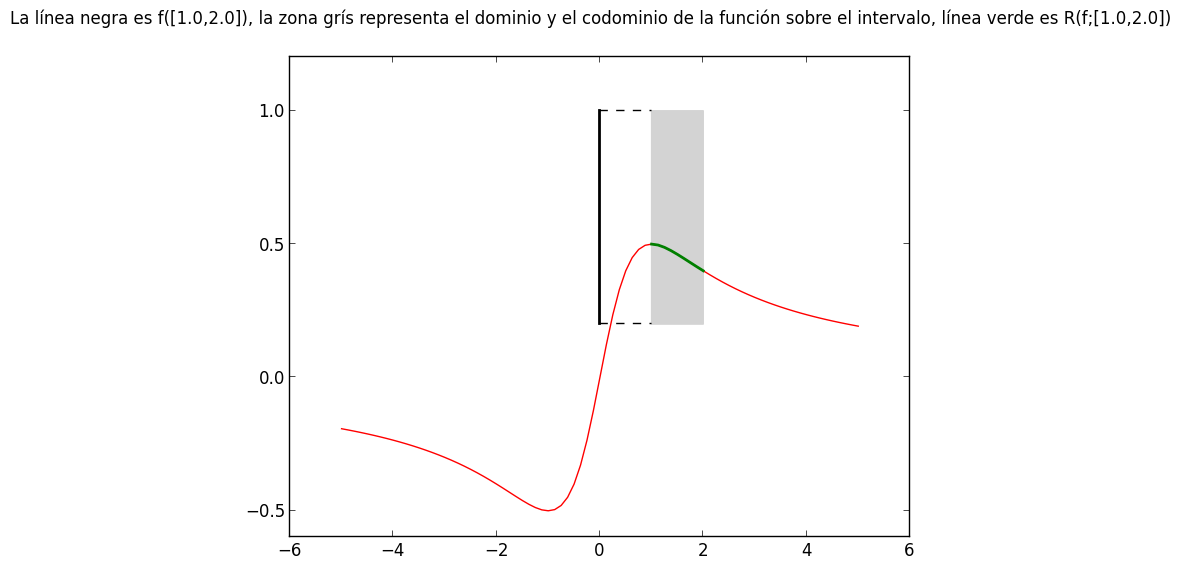

In [5]:
grafica1D(1.0,2.0,p);

#### [4] Demuestra que f(x)=(sin(x)−x²+1)cos(x) no tiene raíces en x=[0,1/2]. Ilustra que el argumento es correcto gráficamente.

In [6]:
import Base.sin
import Base.cos

sin(a::Intervalo) = Intervalo(sin(a.inf),sin(a.sup))
cos(a::Intervalo) = Intervalo(cos(a.inf),cos(a.sup))

cos (generic function with 12 methods)

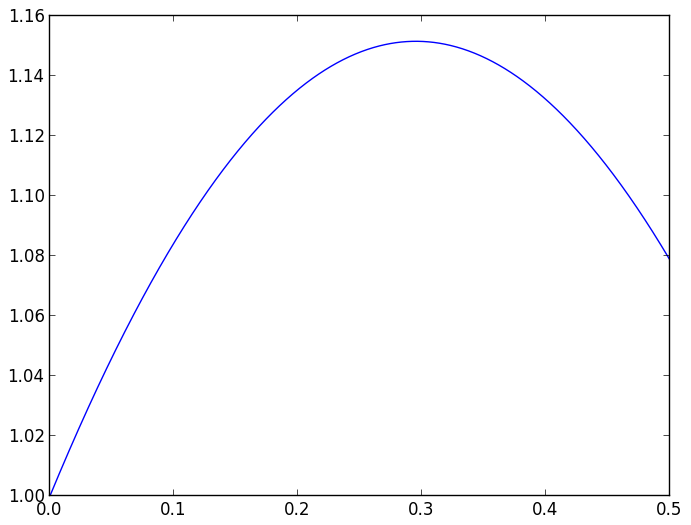

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3aac810>

In [7]:
t(x) = (sin(x)-x^2+1)*cos(x);

ptosx=linspace(0,0.5,1024);
ptosy=[t(ptosx[i]) for i in 1:1024];
plot(ptosx,ptosy)

#### [5] Escribe un código quer utiliza la propiedad de los ceros para encontrar los intervalos donde podría haber un cero.

In [4]:
using Derivada

In [5]:
function bisect(x::Intervalo)
    return [Intervalo(x.inf,(x.sup+x.inf)/2),Intervalo((x.sup+x.inf)/2,x.sup)]
end

bisect (generic function with 1 method)

In [6]:
import Base.zeros

In [7]:
function zeros(T::Intervalo,dim::Integer)
    a=[];
    for i in 1:dim
        a=cat(1,a,Intervalo)
    end
    b=a
    for j in 1:dim-1
        a=cat(2,a,b)
    end
    return a
end

zeros (generic function with 4 methods)

In [8]:
function multisect(x::Intervalo,ntot::Integer) #funcion que hace una bisección ntot veces
    if ntot==0
        return x
    else
        even=[2*i for i in 1:2^ntot];
        odds=even-1;
        A=zeros(Intervalo(0),2^ntot)
        A[1:2,1]=bisect(x)
        for n in 2:ntot
            for i in 1:2^(n-1)
                for j in even[i]
                    for k in odds[i]
                        A[k:j,n]=bisect(A[i,n-1])
                    end
                end
            end
        end
        return A[:,ntot]
    end
end

multisect (generic function with 1 method)

In [9]:
function findzeros(x::Intervalo,numbisecc::Integer,f::Function)
    x1=multisect(x,numbisecc);
    y1=[f(x) for x in x1];
    a=[]
    for i in 1:length(y1)
        B=0 in y1[i]
        a=cat(1,a,B)
    end
    return x1[find(a)]
end

findzeros (generic function with 1 method)

In [10]:
 x=Intervalo(-3.5,-1);

In [11]:
function  g(x)
        (x+3)/(x^2+1)
end

g (generic function with 1 method)

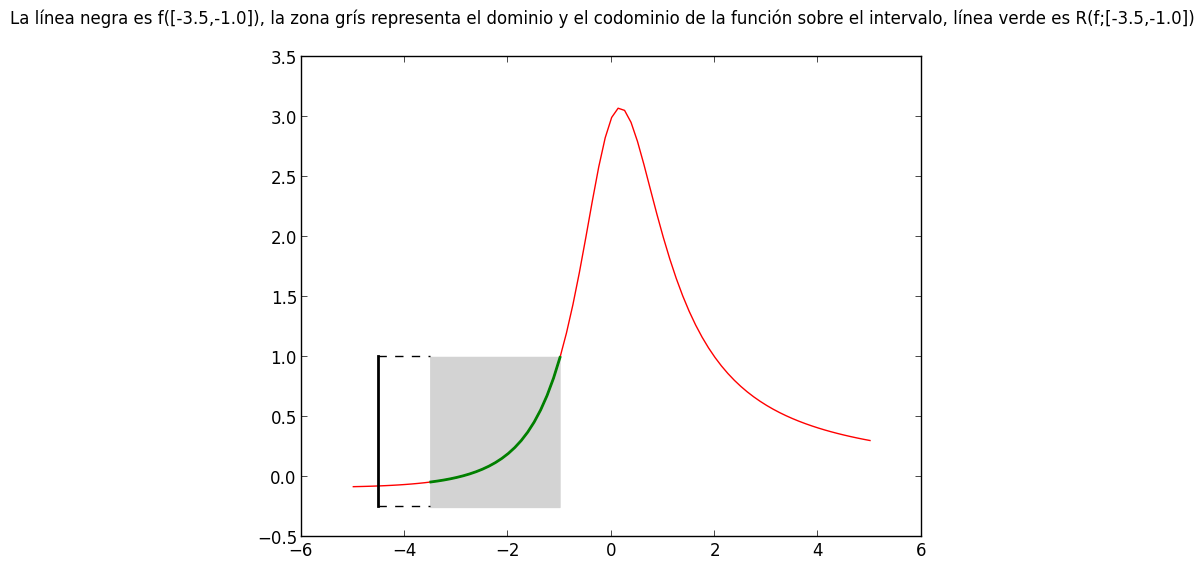

PyObject <matplotlib.text.Text object at 0xaaab750>

In [12]:
grafica1D(-3.5,-1.0,g)

In [23]:
findzeros(x,10,g)

LoadError: `convert` has no method matching convert(::DataType, ::Intervalo)
while loading In[23], in expression starting on line 1

###[6] Extiende tu código para utilizar la derivada f′, dada a mano, para demostrar (cuando se puede) que el cero es único en el intervalo.

In [14]:
function  dg(x)
        ((-1*x)^2-6x+1)/(x^2+1)^2
end

dg (generic function with 1 method)

In [15]:
dg(x)

Intervalo(1,096475614097543609825560697757208971164115343538625845496618013527945888216446e-01 with 256 bits of precision,5,75e+00 with 256 bits of precision)

### [7] Utiliza la diferenciación automática del notebook 6 para que no tengas que especificar la derivada a mano.

#bisecciones recursivas

In [17]:
function  g(x)
        (x+3)/(1+x^2)
end
x=Intervalo(-3.5,-1);
eval=10;

In [18]:
function roots(x::Intervalo,eval::Integer,g::Function)
    x1=bisect(x)
    for k=1:eval;
        y1=[g(x) for x in x1];
        a=[];
        for i in 1:length(y1)
            B=0 in y1[i]
            a=cat(1,a,B)
        end
        if a==falses(lenght(a))
            println("el cero no está en el intervalo")
            break
        else
            x1=[x1[find(a)]]
        end
        #hace la biseccion y la guarda en un arreglo
        lao=[]
        for i in 1:length(x1)
            lao=cat(1,dummy,bisect(x1[i]))
        end
        x1=lao; #ahora x1 es una lista de bisecciones donde probablemente hay un cero
    end
    respuesta=x1[1];
    println("el cero puede estar en este intervalo")
    #prueba para ver si el cero es unico
    arr=[g(Deriv(respuesta,1)).d]
    sub=[];
    for i in 1:length(arr)
        sub=cat(1,sub,[arr[i].inf,arr[i].sup])
    end
    signosenlosextremos=[sign(sub[i]) for i in 1:length(sub)];
    if signosenlosextremos==ones(length(signosenlosextremos))
        println("y además es el cero es único")
    else
        println("pero el cero NO es único en este intervalo")
    end
        return respuesta
end

roots (generic function with 1 method)

In [24]:
function  g(x)
        (x+3)/(x^2+1)
end
eval=8;
tol=2.^-20.;
x=Intervalo(-3.5,0);
X=roots(x,eval,g)

LoadError: `start` has no method matching start(::Intervalo)
while loading In[24], in expression starting on line 7